In [1]:
# 1. Imports and Setup
# --------------------
# We start by importing all the libraries we'll need for data manipulation, visualization, and modeling.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression # Added for Logistic Regression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC # Added for Support Vector Classifier
from sklearn.naive_bayes import GaussianNB # Added for Gaussian Naive Bayes
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, silhouette_score
# from google.colab import drive # For Google Colab drive mounting

# --- Configuration ---
# Set plotting style
sns.set_style("whitegrid")
# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 2. Load the Dataset
# -------------------
# Read the Excel file into a DataFrame

# IMPORTANT : Enter the required file path

# For Google Colab
# drive.mount('/content/drive')
# file_path = "/content/drive/My Drive/ECLEARNIX_Hackathon_10K_Dataset.xlsx"

# For Python
file_path = "C:\\Users\\Atharva\\Downloads\\ECLEARNIX_Hackathon_Dataset.xlsx"
df = pd.read_excel(file_path)
print(df.head())
print("----------------")
print(df.tail())
print("----------------")
print(df.value_counts())
print("----------------")
print(df.isnull().sum())

     User_ID     User_Type   Department Region Platform_Source  App_Installed  \
0  ECL100000       Faculty  Polytechnic  South           Email              0   
1  ECL100001       Faculty          Law   West        LinkedIn              1   
2  ECL100002       Faculty      Medical  North     ACE Website              1   
3  ECL100003  Professional         Arts  South           Email              0   
4  ECL100004       Faculty      Science   East           Email              1   

   First_Login_Completed  Days_Since_Last_Activity  Registered_for_Event  \
0                      1                        18                     0   
1                      0                        85                     0   
2                      0                         6                     1   
3                      1                        41                     0   
4                      0                         5                     0   

   Event_Type Event_Mode  Newsletter_Subscribed  Saved_E


--- Enhanced EDA: Data Structure & Summary ---
Dataset contains 10000 rows and 16 columns.

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   User_ID                   10000 non-null  object
 1   User_Type                 10000 non-null  object
 2   Department                10000 non-null  object
 3   Region                    10000 non-null  object
 4   Platform_Source           10000 non-null  object
 5   App_Installed             10000 non-null  int64 
 6   First_Login_Completed     10000 non-null  int64 
 7   Days_Since_Last_Activity  10000 non-null  int64 
 8   Registered_for_Event      10000 non-null  int64 
 9   Event_Type                10000 non-null  object
 10  Event_Mode                10000 non-null  object
 11  Newsletter_Subscribed     10000 non-null  int64 
 12  Saved_Event_Count     

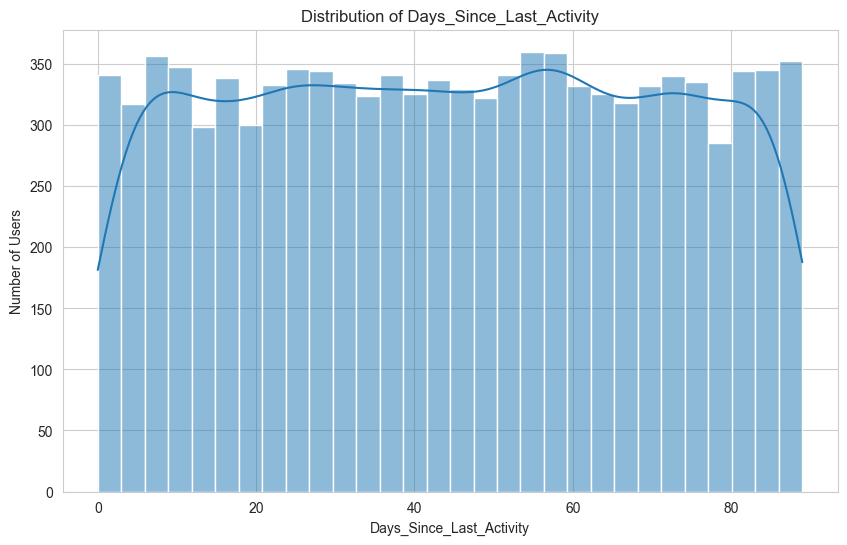


Statistics for Days_Since_Last_Activity:
count    10000.000000
mean        44.583300
std         25.990168
min          0.000000
25%         22.000000
50%         45.000000
75%         67.000000
max         89.000000
Name: Days_Since_Last_Activity, dtype: float64


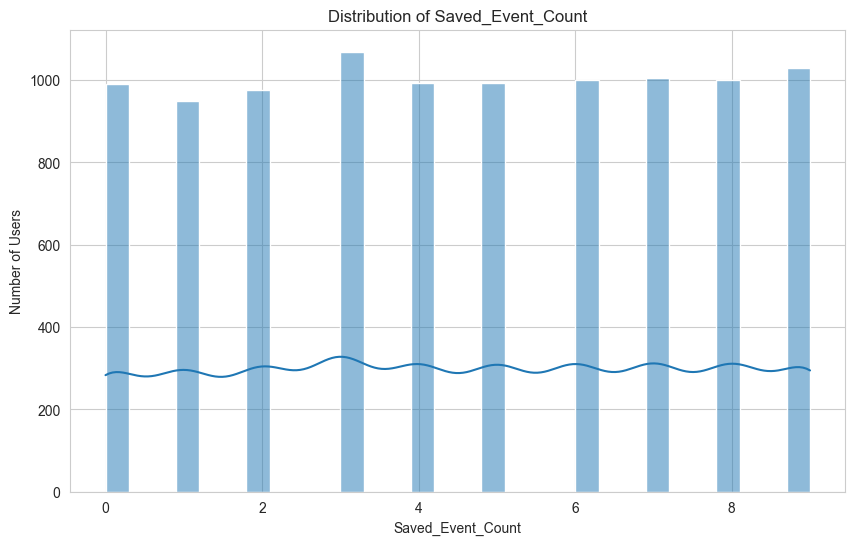


Statistics for Saved_Event_Count:
count    10000.000000
mean         4.532400
std          2.868061
min          0.000000
25%          2.000000
50%          5.000000
75%          7.000000
max          9.000000
Name: Saved_Event_Count, dtype: float64


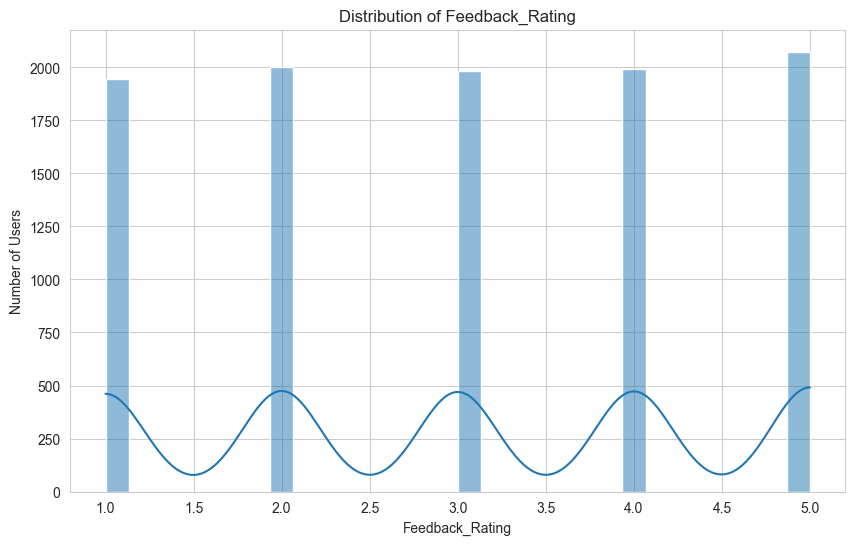


Statistics for Feedback_Rating:
count    10000.000000
mean         3.024700
std          1.416789
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: Feedback_Rating, dtype: float64


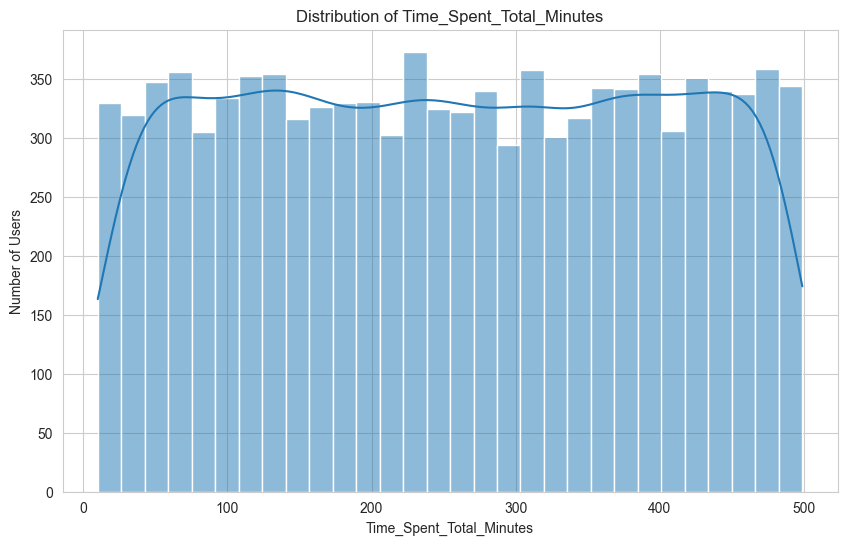


Statistics for Time_Spent_Total_Minutes:
count    10000.000000
mean       255.457600
std        141.955579
min         10.000000
25%        133.000000
50%        255.000000
75%        380.000000
max        499.000000
Name: Time_Spent_Total_Minutes, dtype: float64

Value counts for User_Type:
User_Type
Entrepreneur    2547
Student         2531
Professional    2480
Faculty         2442
Name: count, dtype: int64



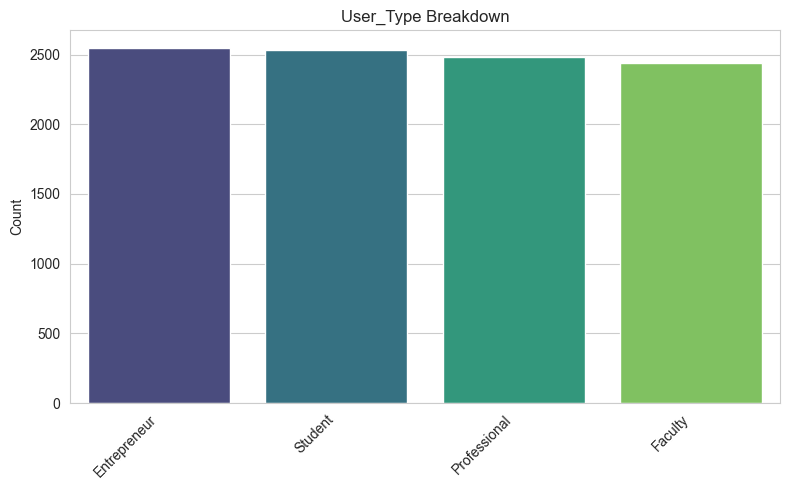


Value counts for Department:
Department
Law            1500
Science        1449
Arts           1439
Polytechnic    1420
Engineering    1417
Medical        1398
Commerce       1377
Name: count, dtype: int64



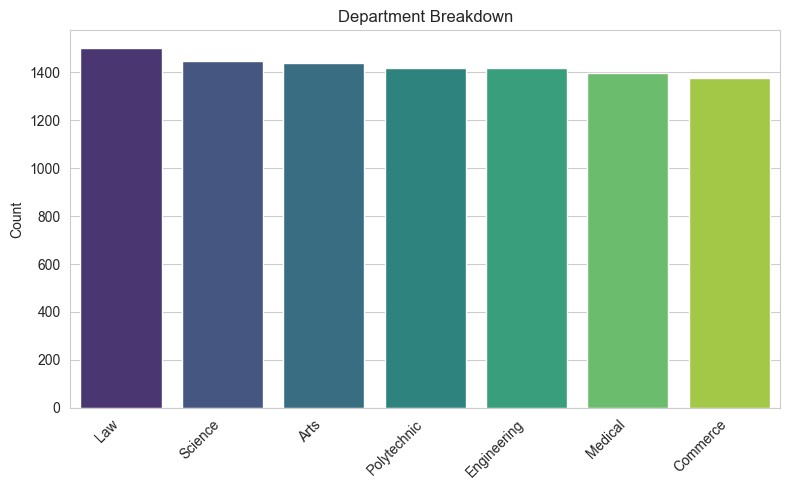


Value counts for Region:
Region
South      2073
East       2052
North      1997
Central    1970
West       1908
Name: count, dtype: int64



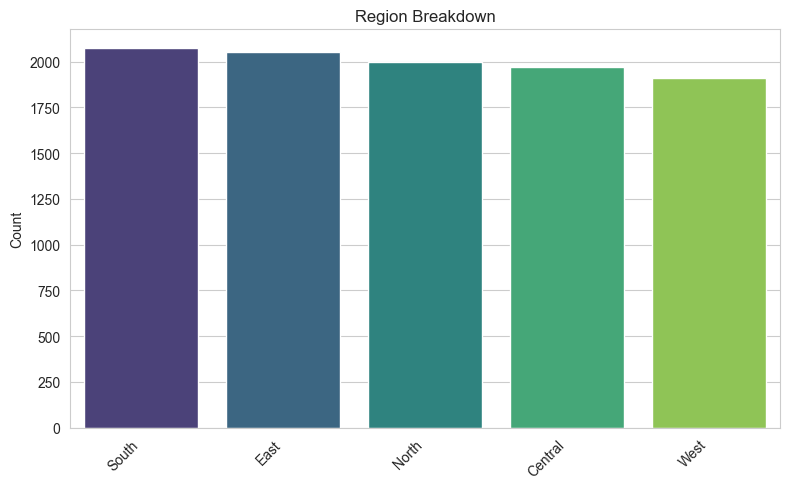


Value counts for Platform_Source:
Platform_Source
YouTube        1740
LinkedIn       1673
WhatsApp       1670
Email          1665
ACE Website    1631
Instagram      1621
Name: count, dtype: int64



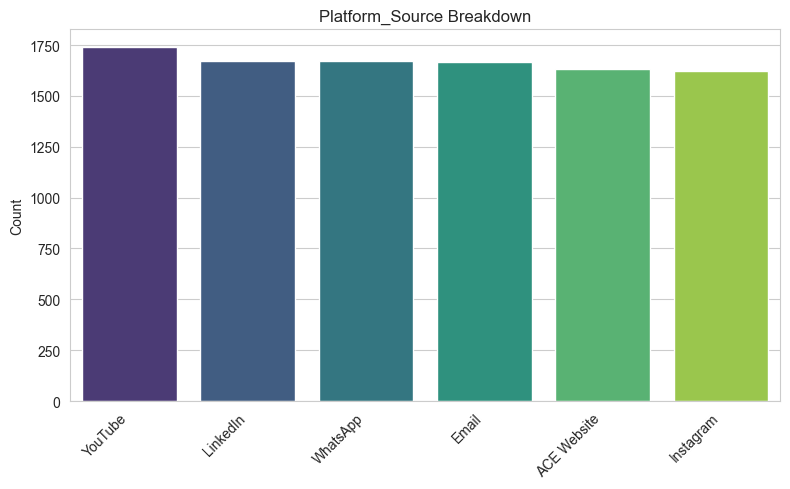


Value counts for Event_Type:
Event_Type
Workshop      1719
Conference    1680
Webinar       1674
STTP          1664
FDP           1664
Hackathon     1599
Name: count, dtype: int64



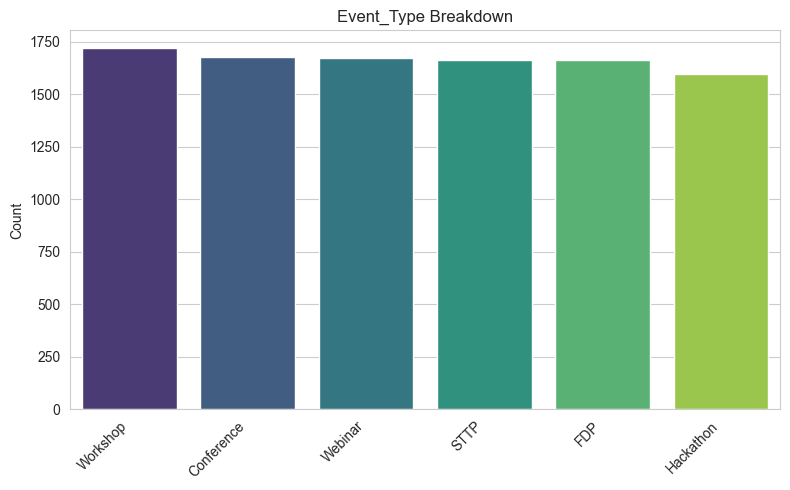


Value counts for Event_Mode:
Event_Mode
Online     3373
Offline    3346
Hybrid     3281
Name: count, dtype: int64



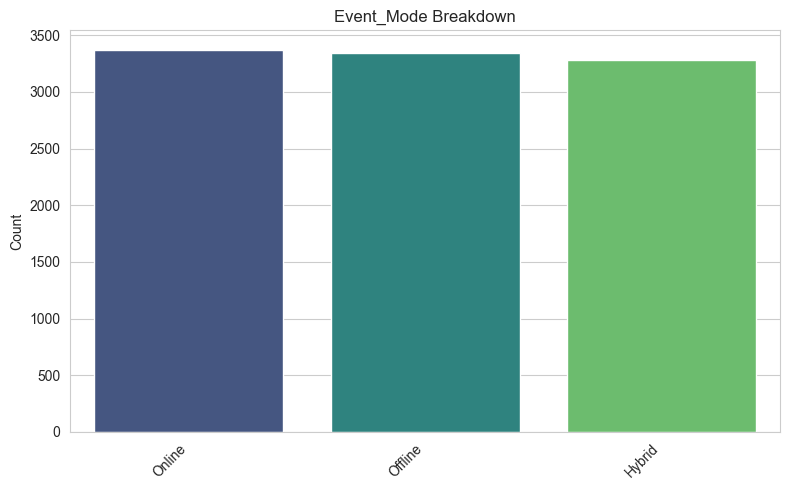


Value counts for App_Installed:
App_Installed
1    6969
0    3031
Name: count, dtype: int64



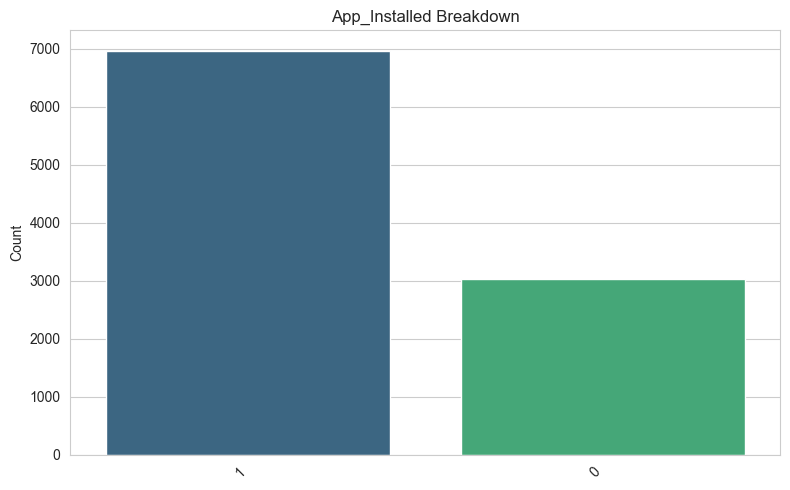


Value counts for First_Login_Completed:
First_Login_Completed
1    6049
0    3951
Name: count, dtype: int64



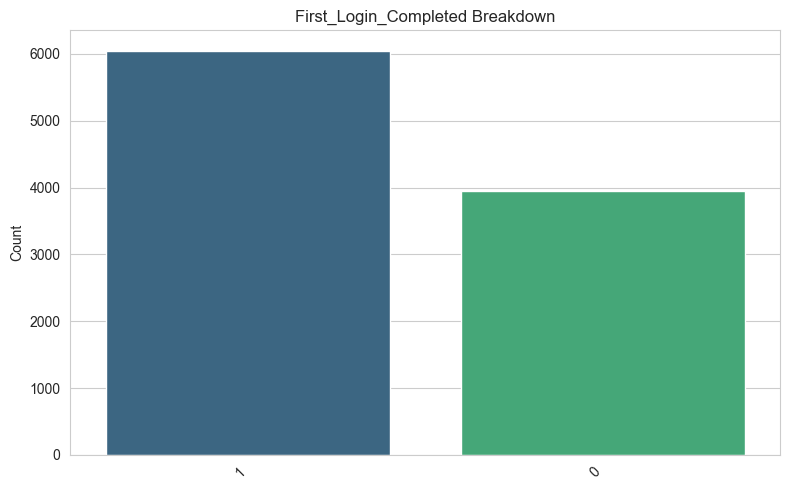


Value counts for Registered_for_Event:
Registered_for_Event
0    5042
1    4958
Name: count, dtype: int64



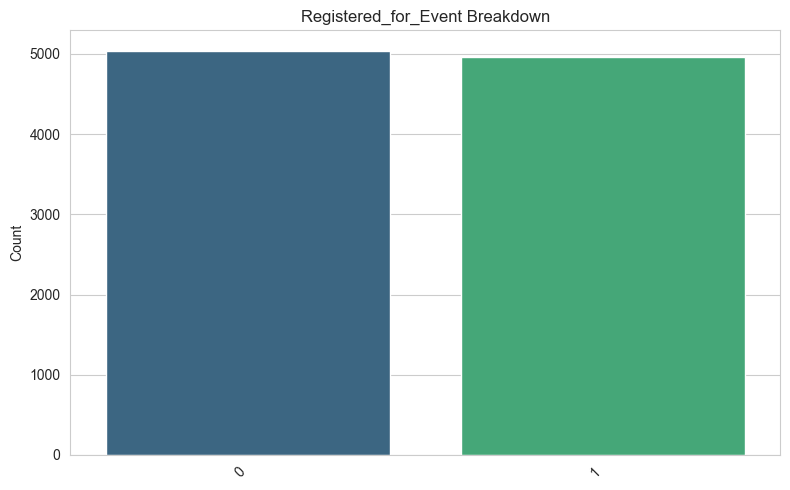


Value counts for Newsletter_Subscribed:
Newsletter_Subscribed
0    7455
1    2545
Name: count, dtype: int64



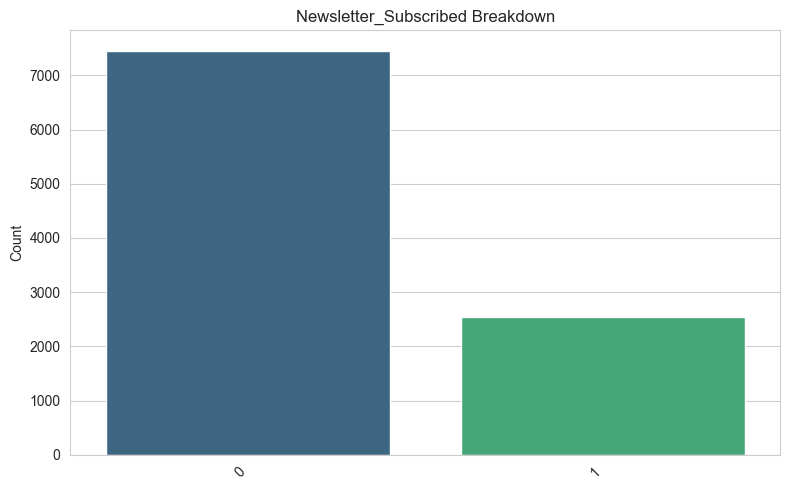


Value counts for Course_Completed:
Course_Completed
0    5963
1    4037
Name: count, dtype: int64



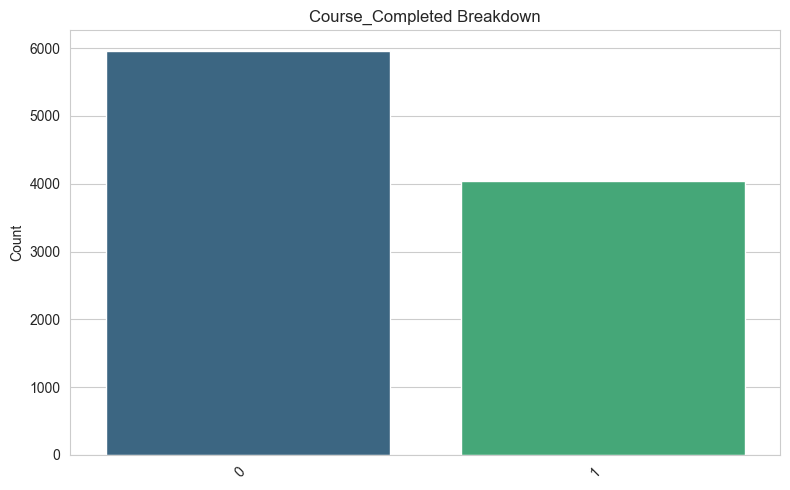


--- Key Performance Metrics & Bivariate Analysis ---

Percentage of users who installed the app: 69.69%
Percentage of first login users (among those who installed): 59.85%
Overall percentage of first login users: 60.49%

Percentage of users inactive for more than 30 days: 65.80%

Overall Course Completion Rate: 40.37%

Overall Event Registration Rate: 49.58%

Feedback Rating Distribution:
Feedback_Rating
5    20.74
2    20.03
4    19.94
3    19.83
1    19.46
Name: proportion, dtype: float64


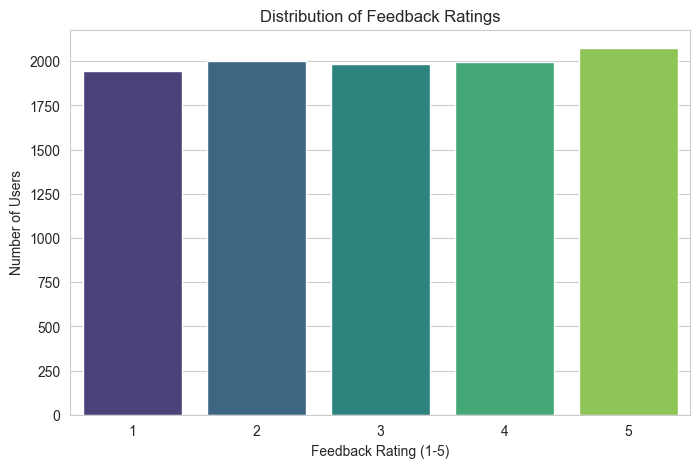

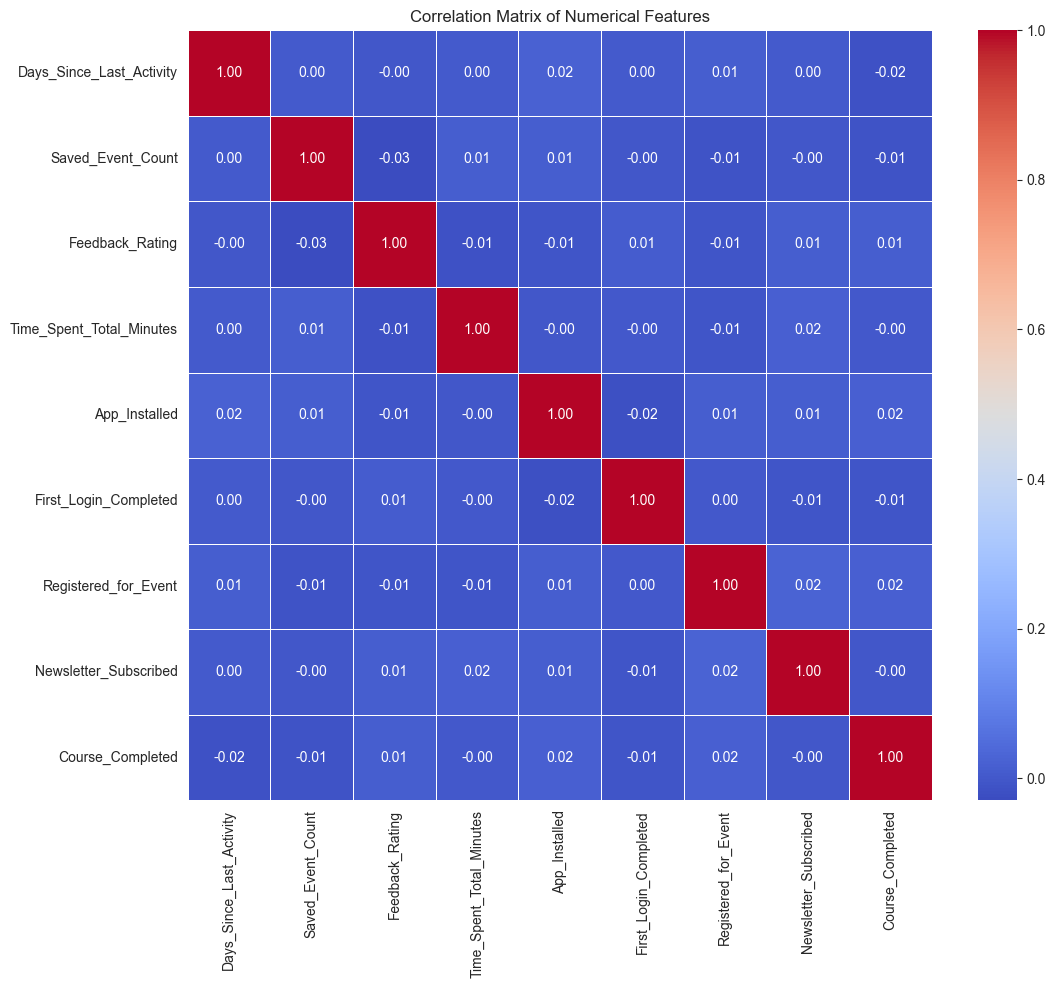


Performance Metrics by Platform Source (Rates %):
                 App_Installed_Rate  First_Login_Rate  Course_Completion_Rate  \
Platform_Source                                                                 
YouTube                   70.977011         59.827586               41.379310   
Instagram                 70.388649         58.914250               38.494756   
WhatsApp                  70.299401         60.718563               40.179641   
LinkedIn                  69.695158         62.283323               41.303048   
ACE Website               69.221337         59.717964               40.404660   
Email                     67.507508         61.441441               40.360360   

                 Event_Registration_Rate  Avg_Time_Spent  Avg_Days_Inactive  
Platform_Source                                                              
YouTube                        50.459770    25610.057471        4442.643678  
Instagram                      48.735349    25501.850709        44

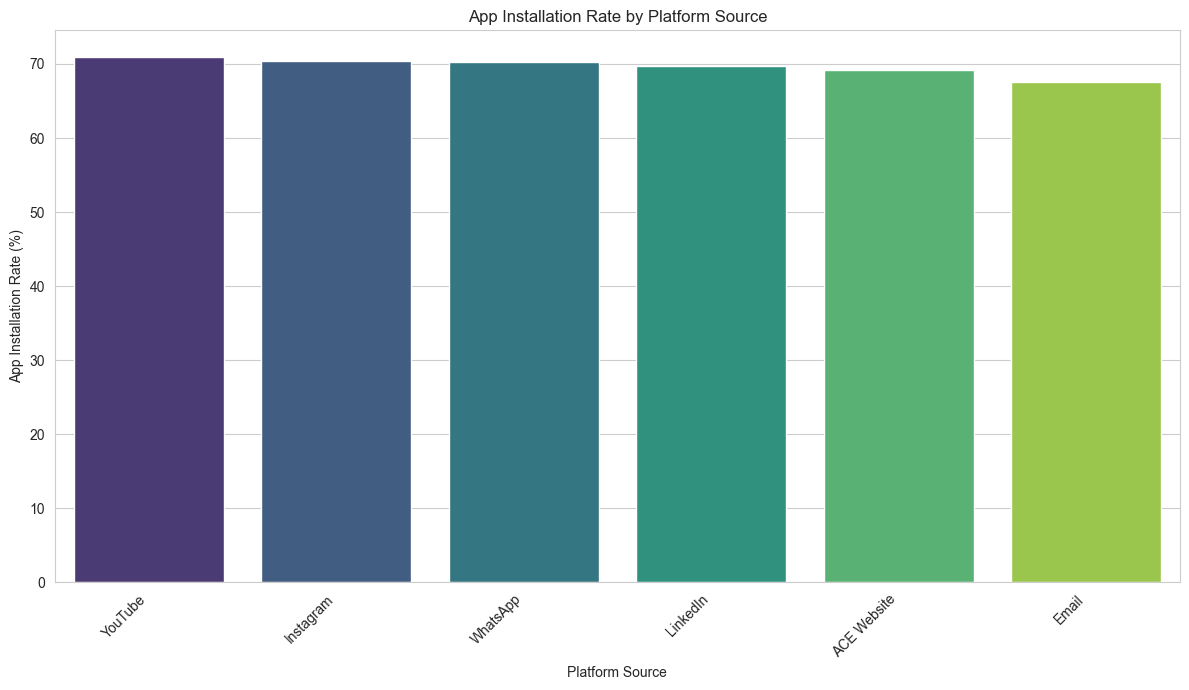


Performance Metrics by Region (Rates %):
         App_Installed_Rate  First_Login_Rate  Course_Completion_Rate  \
Region                                                                  
West              71.226415         59.171908               39.308176   
Central           70.456853         61.776650               40.152284   
North             69.504256         61.692539               39.709564   
East              69.005848         60.721248               41.130604   
South             68.403280         59.093102               41.437530   

         Event_Registration_Rate  Avg_Time_Spent  Avg_Days_Inactive  
Region                                                               
West                   48.322851    25344.758910        4481.918239  
Central                49.898477    25597.512690        4427.512690  
North                  49.323986    25573.510265        4393.390085  
East                   49.415205    25887.914230        4498.391813  
South                  50.

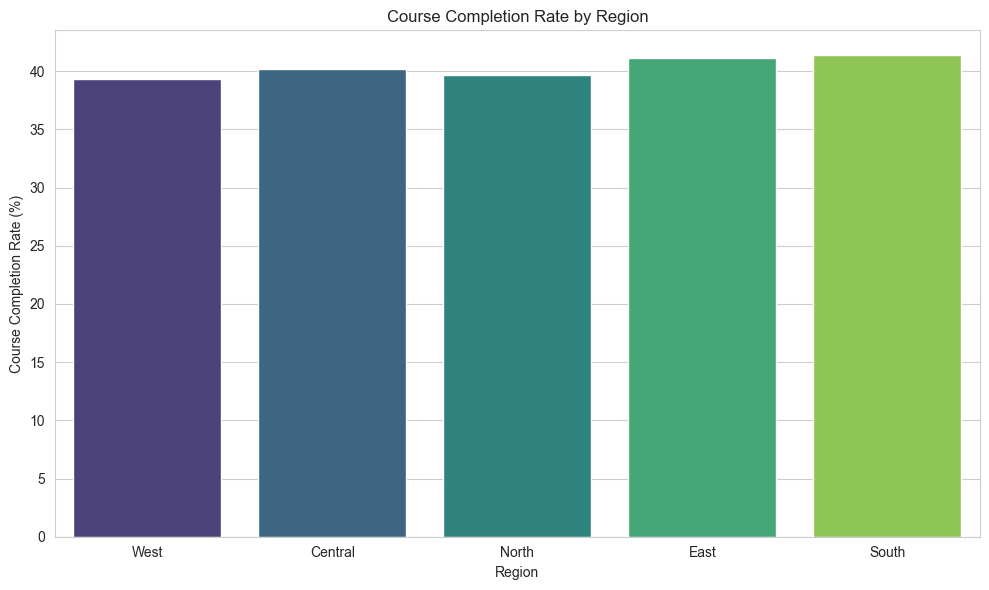


--- Engagement Funnel Overview ---
              Stage  Users  Rate (%)
0       Total Users  10000    100.00
1     App Installed   6969     69.69
2       First Login   6049     86.80
3  Event Registered   4958     81.96
4  Course Completed   4037     81.42


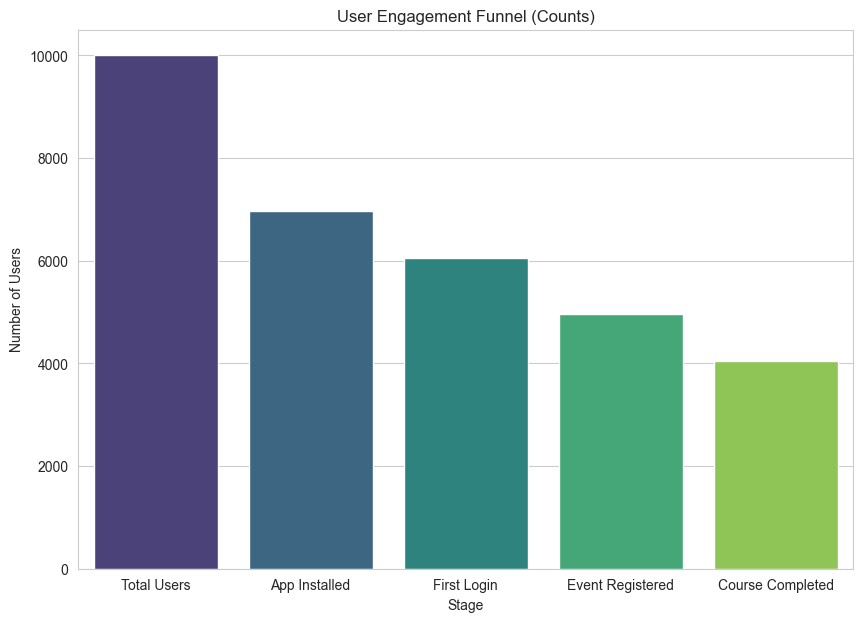

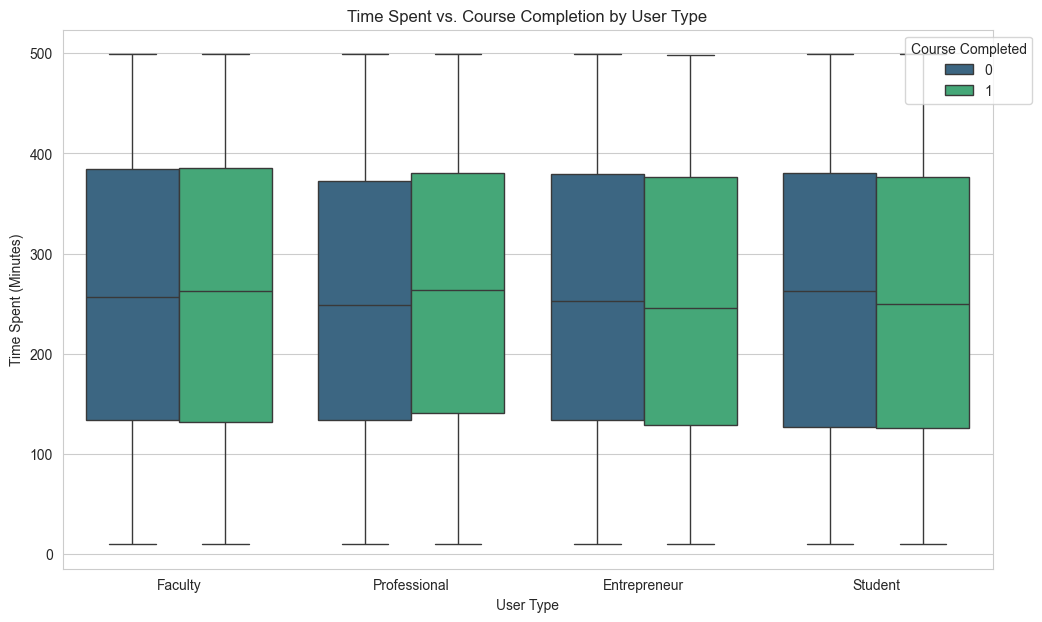

In [3]:
# 3. Enhanced Exploratory Data Analysis (EDA)
# -----------------------------------------

# To understand volume, variable types, and basic distributions.
print("\n--- Enhanced EDA: Data Structure & Summary ---")
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")
print("\nDataFrame Info:")
print(df.info())
print("\nDescriptive Statistics (including all data types):")
print(df.describe(include = 'all'))

print("\n--- Enhanced EDA: Data Quality Checks ---")
# 3.1 Missing values
missing = df.isnull().sum().sort_values(ascending = False)
print("Missing values per column:\n", missing[missing > 0]) # Only show columns with missing values
# This is to know which columns need cleaning or imputation.

# 3.2 Duplicate rows
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")
if duplicates > 0:
    print("Consider removing duplicate rows if they represent redundant entries, not valid repeated observations.")
    # df.drop_duplicates(inplace = True) # Uncomment to remove duplicates if desired
    # print(f"Removed {duplicates} duplicate rows. New shape: {df.shape}")
# This is to prevent getting duplicate rows which can skew analysis and model training.

print("\n--- Enhanced EDA: Univariate & Bivariate Analysis ---")

# 3.3 Univariate plots for Numerical Features
numerical_cols = df.select_dtypes(include = np.number).columns.tolist()
# Exclude User_ID if it's numerical but purely an identifier
if 'User_ID' in numerical_cols:
    numerical_cols.remove('User_ID')
# Exclude binary columns that are essentially categorical from histograms unless appropriate
binary_numerical_cols = ['App_Installed', 'First_Login_Completed', 'Registered_for_Event', 'Newsletter_Subscribed', 'Course_Completed']
for col in binary_numerical_cols:
    if col in numerical_cols:
        numerical_cols.remove(col)

for col in numerical_cols:
    plt.figure(figsize = (10, 6))
    sns.histplot(df[col].dropna(), bins = 30, kde = True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Number of Users")
    plt.show()
    print(f"\nStatistics for {col}:\n{df[col].describe()}")
# Specifically, this is to see how engagement (time spent on app, or days of activity) varies across users and identify outliers/skewness.

# 3.4 Categorical counts and distributions
categorical_cols_for_eda = df.select_dtypes(include='object').columns.tolist() + binary_numerical_cols
if 'User_ID' in categorical_cols_for_eda:
    categorical_cols_for_eda.remove('User_ID')
for col in categorical_cols_for_eda:
    if col in df.columns: # Ensure column exists
        counts = df[col].value_counts()
        print(f"\nValue counts for {col}:\n{counts}\n")
        plt.figure(figsize=(8, 5))
        sns.countplot(x = col, data = df, order = counts.index, palette = 'viridis')
        plt.title(f"{col} Breakdown")
        plt.ylabel("Count")
        plt.xlabel("") # Remove x-label if categories are self-explanatory
        plt.xticks(rotation = 45, ha = 'right')
        plt.tight_layout()
        plt.show()
# This is to identify dominant user types, regions, and acquisition channels, and see distribution of binary flags.

# 3.5 Bivariate Analysis and Key Metrics
print("\n--- Key Performance Metrics & Bivariate Analysis ---")

# App Installation Rate
app_installed_rate = df['App_Installed'].mean() * 100
print(f"\nPercentage of users who installed the app: {app_installed_rate:.2f}%")

# First Login Completion Rate
# Ensure we only consider users who installed for 'first_login_rate_among_installed'
users_with_app = df[df['App_Installed'] == 1]
if not users_with_app.empty:
    first_login_rate_among_installed = users_with_app['First_Login_Completed'].mean() * 100
    print(f"Percentage of first login users (among those who installed): {first_login_rate_among_installed:.2f}%")
else:
    print("No users installed the app, cannot calculate first login rate among installed.")

overall_first_login_rate = df['First_Login_Completed'].mean() * 100
print(f"Overall percentage of first login users: {overall_first_login_rate:.2f}%")

# Percentage of Inactive Users (e.g., inactive for more than 30 days)
inactive_threshold = 30
inactive_users_percentage = (df['Days_Since_Last_Activity'] > inactive_threshold).mean() * 100
print(f"\nPercentage of users inactive for more than {inactive_threshold} days: {inactive_users_percentage:.2f}%")

# Course Completion Rate
overall_course_completion_rate = df['Course_Completed'].mean() * 100
print(f"\nOverall Course Completion Rate: {overall_course_completion_rate:.2f}%")

# Event Registration Rate
overall_event_registration_rate = df['Registered_for_Event'].mean() * 100
print(f"\nOverall Event Registration Rate: {overall_event_registration_rate:.2f}%")

# Feedback Rating Distribution
print("\nFeedback Rating Distribution:")
print(df['Feedback_Rating'].value_counts(normalize = True) * 100)
plt.figure(figsize = (8, 5))
sns.countplot(x = 'Feedback_Rating', data = df, palette = 'viridis')
plt.title('Distribution of Feedback Ratings')
plt.xlabel('Feedback Rating (1-5)')
plt.ylabel('Number of Users')
plt.show()

# Correlation Heatmap for Numerical Features
plt.figure(figsize = (12, 10))
sns.heatmap(df[numerical_cols + binary_numerical_cols].corr(), annot = True, cmap = 'coolwarm', fmt = ".2f", linewidths = .5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()
# This is important to identify relationships between numerical features and potential multicollinearity.

# Performance by Platform Source (Rates)
print("\nPerformance Metrics by Platform Source (Rates %):")
platform_performance = df.groupby('Platform_Source').agg(
    Total_Users = ('User_ID', 'count'), # Keep total users for context
    App_Installed_Rate = ('App_Installed', 'mean'),
    First_Login_Rate = ('First_Login_Completed', 'mean'),
    Course_Completion_Rate = ('Course_Completed', 'mean'),
    Event_Registration_Rate = ('Registered_for_Event', 'mean'),
    Avg_Time_Spent = ('Time_Spent_Total_Minutes', 'mean'),
    Avg_Days_Inactive = ('Days_Since_Last_Activity', 'mean')
).sort_values(by = 'App_Installed_Rate', ascending = False)
print(platform_performance[['App_Installed_Rate', 'First_Login_Rate', 'Course_Completion_Rate',
                            'Event_Registration_Rate', 'Avg_Time_Spent', 'Avg_Days_Inactive']] * 100) # Convert to percentage for rates

# Visualizing App Installation Rate by Platform Source
plt.figure(figsize = (12, 7))
sns.barplot(x = platform_performance.index, y = platform_performance['App_Installed_Rate'] * 100, palette = 'viridis')
plt.title('App Installation Rate by Platform Source')
plt.xlabel('Platform Source')
plt.ylabel('App Installation Rate (%)')
plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout()
plt.show()

# Performance by Region (Rates)
print("\nPerformance Metrics by Region (Rates %):")
region_performance = df.groupby('Region').agg(
    Total_Users = ('User_ID', 'count'),
    App_Installed_Rate = ('App_Installed', 'mean'),
    First_Login_Rate = ('First_Login_Completed', 'mean'),
    Course_Completion_Rate = ('Course_Completed', 'mean'),
    Event_Registration_Rate = ('Registered_for_Event', 'mean'),
    Avg_Time_Spent = ('Time_Spent_Total_Minutes', 'mean'),
    Avg_Days_Inactive = ('Days_Since_Last_Activity', 'mean')
).sort_values(by = 'App_Installed_Rate', ascending = False)
print(region_performance[['App_Installed_Rate', 'First_Login_Rate', 'Course_Completion_Rate',
                         'Event_Registration_Rate', 'Avg_Time_Spent', 'Avg_Days_Inactive']] * 100) # Convert to percentage for rates

# Visualizing Course Completion Rate by Region
plt.figure(figsize = (10, 6))
sns.barplot(x = region_performance.index, y = region_performance['Course_Completion_Rate'] * 100, palette = 'viridis')
plt.title('Course Completion Rate by Region')
plt.xlabel('Region')
plt.ylabel('Course Completion Rate (%)')
plt.tight_layout()
plt.show()

# --- Engagement Funnel Visualization ---
# Calculate overall conversion rates for a general funnel
total_users = df.shape[0]
installed_users = df['App_Installed'].sum()
first_login_users = df['First_Login_Completed'].sum()
course_completed_users = df['Course_Completed'].sum()
event_registered_users = df['Registered_for_Event'].sum()

funnel_stages = ['Total Users', 'App Installed', 'First Login', 'Event Registered', 'Course Completed']
funnel_counts = [total_users, installed_users, first_login_users, event_registered_users, course_completed_users]

# Calculate conversion rates for each step from the *previous* step, except Total Users (100%)
# Ensure to handle potential division by zero if an earlier stage has 0 users
funnel_rates = []
for i, count in enumerate(funnel_counts):
    if i == 0: # Total Users stage
        funnel_rates.append(100.0)
    elif funnel_counts[i-1] == 0: # If previous stage had 0 users, rate is 0 to avoid division by zero
        funnel_rates.append(0.0)
    else:
        funnel_rates.append((count / funnel_counts[i-1]) * 100)

print("\n--- Engagement Funnel Overview ---")
funnel_df = pd.DataFrame({'Stage': funnel_stages, 'Users': funnel_counts, 'Rate (%)': [round(r, 2) for r in funnel_rates]})
print(funnel_df)

plt.figure(figsize = (10, 7))
sns.barplot(x = 'Stage', y = 'Users', data = funnel_df, palette = 'viridis')
plt.title('User Engagement Funnel (Counts)')
plt.ylabel('Number of Users')
plt.show()

# Optional: Further bivariate plots (e.g., Time Spent vs. Course Completion by User Type)
plt.figure(figsize = (12, 7))
sns.boxplot(x = 'User_Type', y = 'Time_Spent_Total_Minutes', hue = 'Course_Completed', data = df, palette = 'viridis')
plt.title('Time Spent vs. Course Completion by User Type')
plt.xlabel('User Type')
plt.ylabel('Time Spent (Minutes)')
plt.legend(title = 'Course Completed', bbox_to_anchor = (1.05, 1), loc = 'upper right')
plt.show()

In [4]:
# 4. Preprocessing Pipeline
# -------------------------
# Moved these base lists outside the preprocessor definition to be used for dynamic filtering
# Base feature lists - these should contain all columns that could be features for any model
all_numerical_features_excluding_id = [
    'Days_Since_Last_Activity',
    'Saved_Event_Count',
    'Feedback_Rating',
    'Time_Spent_Total_Minutes'
]

# Including binary features as categorical for OneHotEncoder, for consistency with clustering
all_categorical_features = [
    'User_Type', 'Department', 'Region',
    'Platform_Source', 'Event_Type', 'Event_Mode',
    'App_Installed', 'First_Login_Completed', 'Registered_for_Event', 'Newsletter_Subscribed', 'Course_Completed'
]

# Ensure lists only contain columns present in df to avoid errors in initial setup
all_numerical_features_excluding_id = [f for f in all_numerical_features_excluding_id if f in df.columns]
all_categorical_features = [f for f in all_categorical_features if f in df.columns]

# Define a helper function to create a preprocessor for a given set of features
# This function will dynamically select features that are present in the input X DataFrame
def create_task_preprocessor(df_columns_for_X, num_features_base_list, cat_features_base_list):
    # Filter features based on what's available in the current X (df_columns_for_X)
    current_numerical_features = [f for f in num_features_base_list if f in df_columns_for_X]
    current_categorical_features = [f for f in cat_features_base_list if f in df_columns_for_X]

    # Define transformers
    numeric_transformer = Pipeline([
        ('imputer', SimpleImputer(strategy = 'median')),
        ('scaler', StandardScaler())
    ])

    categorical_transformer = Pipeline([
        ('imputer', SimpleImputer(strategy = 'constant', fill_value = 'Unknown')),
        ('onehot', OneHotEncoder(handle_unknown = 'ignore'))
    ])

    # Build ColumnTransformer for this specific task
    task_preprocessor = ColumnTransformer(
        transformers = [
            ('num', numeric_transformer, current_numerical_features),
            ('cat', categorical_transformer, current_categorical_features)
        ],
        remainder = 'drop' # Drop any features not explicitly listed for this specific task
    )
    return task_preprocessor, current_numerical_features, current_categorical_features


--- Starting User Segmentation (K-Means Clustering) ---


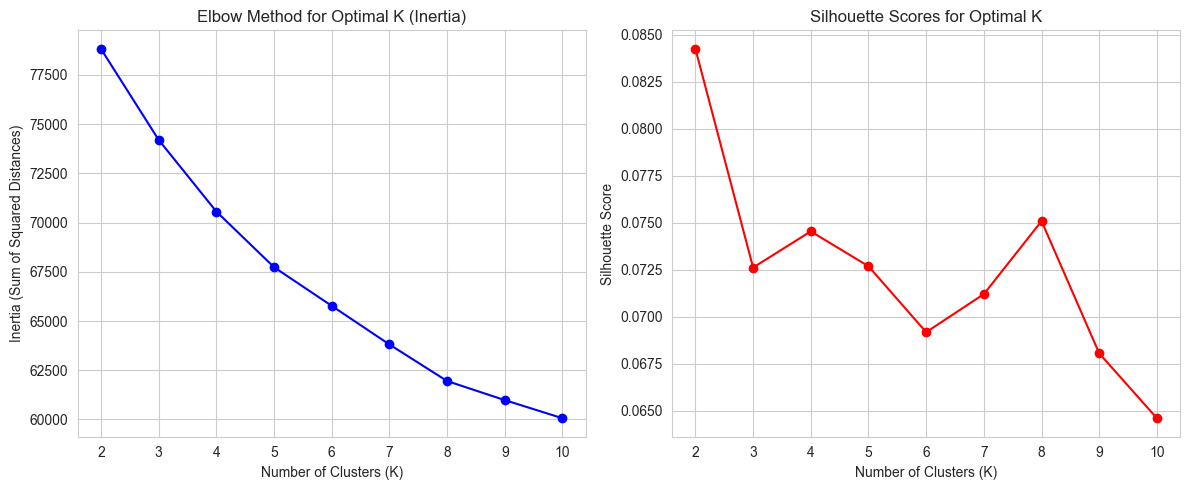


--- Cluster Profiling for 4 Clusters ---
Mean of Numerical and Binary Features per Cluster:
         Time_Spent_Total_Minutes  Days_Since_Last_Activity  \
Cluster                                                       
0                      370.229976                 44.612609   
1                      144.510612                 44.168571   
2                      366.498201                 45.077569   
3                      138.580530                 44.466957   

         Saved_Event_Count  Feedback_Rating  App_Installed  \
Cluster                                                      
0                 7.134021         2.481761       0.708565   
1                 3.720408         1.692653       0.701633   
2                 1.953619         3.568573       0.682127   
3                 5.275425         4.319747       0.695291   

         First_Login_Completed  Registered_for_Event  Newsletter_Subscribed  \
Cluster                                                                     

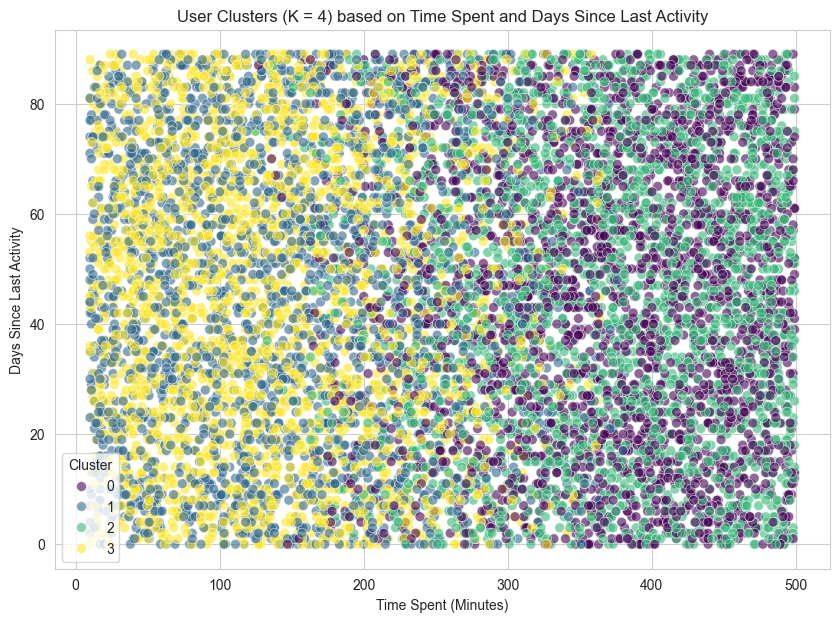


--- User Segmentation Finished ---


In [5]:
# 5. User Segmentation (Clustering) - K-Means
# ---------------------------------------------
# Objective: Identify distinct user segments based on behavioral patterns for targeted strategies.
# Type of Learning: Unsupervised Learning (no target variable 'y')

print("\n--- Starting User Segmentation (K-Means Clustering) ---")

# Features for clustering - choose a subset of relevant behavioral and demographic features
# Exclude identifiers and potentially highly correlated features if desired after correlation analysis
clustering_features = df[['Time_Spent_Total_Minutes', 'Days_Since_Last_Activity', 'Saved_Event_Count',
                          'Feedback_Rating', 'App_Installed', 'First_Login_Completed',
                          'Registered_for_Event', 'Newsletter_Subscribed', 'Course_Completed',
                          'User_Type', 'Platform_Source', 'Region']] # Including some categorical for clustering profiling

# Apply the preprocessor to the clustering features
# Note: For clustering, you usually don't use a 'remainder' that keeps unscaled/unencoded data.
# We'll create a new preprocessor instance focused on clustering features
clustering_numeric_features = [f for f in ['Time_Spent_Total_Minutes', 'Days_Since_Last_Activity', 'Saved_Event_Count', 'Feedback_Rating'] if f in clustering_features.columns]
clustering_categorical_features = [f for f in ['User_Type', 'Platform_Source', 'Region'] if f in clustering_features.columns]
clustering_binary_features = [f for f in ['App_Installed', 'First_Login_Completed', 'Registered_for_Event', 'Newsletter_Subscribed', 'Course_Completed'] if f in clustering_features.columns]

# Preprocessor for clustering features only
clustering_preprocessor = ColumnTransformer(
    transformers = [
        ('num', Pipeline([('imputer', SimpleImputer(strategy = 'median')), ('scaler', StandardScaler())]), clustering_numeric_features),
        ('cat', Pipeline([('imputer', SimpleImputer(strategy = 'constant', fill_value = 'Unknown')), ('onehot', OneHotEncoder(handle_unknown = 'ignore'))]), clustering_categorical_features + clustering_binary_features)
    ],
    remainder = 'drop' # Drop any features not explicitly listed for clustering
)

# Transform the data for clustering
X_clustered = clustering_preprocessor.fit_transform(df[clustering_features.columns])


# Determine optimal K using Elbow Method and Silhouette Score
inertia = []
silhouette_scores = []
k_range = range(2, 11) # Test K values from 2 to 10

for k in k_range:
    kmeans = KMeans(n_clusters = k, random_state = 42, n_init = 10) # n_init suppresses a warning
    kmeans.fit(X_clustered)
    inertia.append(kmeans.inertia_)
    if k > 1: # Silhouette score requires at least 2 clusters
        silhouette_scores.append(silhouette_score(X_clustered, kmeans.labels_))

# Plotting the Elbow Method and Silhouette Scores for K selection
plt.figure(figsize = (12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, marker = 'o', linestyle = '-', color = 'blue')
plt.title('Elbow Method for Optimal K (Inertia)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Sum of Squared Distances)')

plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, marker = 'o', linestyle = '-', color = 'red')
plt.title('Silhouette Scores for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

# --- Apply K-Means with the Optimal K (Choose K based on the plots) ---
# For demonstration, let's assume optimal_k = 4 (which we decide based on the plot analysis)
# If the plots are ambiguous, 3 or 4 are common starting points for interpretation.
optimal_k = 4 # Adjust based on plots
kmeans_model = KMeans(n_clusters = optimal_k, random_state = 42, n_init = 10)
df['Cluster'] = kmeans_model.fit_predict(X_clustered) # Assign cluster label back to original DataFrame

# --- Characterize Clusters (Behavioral Pattern Recognition) ---
# Analyze the mean values of original (unscaled) numerical features for each cluster
# and the distribution of original categorical features.
print(f"\n--- Cluster Profiling for {optimal_k} Clusters ---")
# Numerical features mean by cluster
cluster_profiling_num = df.groupby('Cluster')[clustering_numeric_features + clustering_binary_features].mean()
print("Mean of Numerical and Binary Features per Cluster:")
print(cluster_profiling_num)

# Distribution of Categorical features by cluster
for col in clustering_categorical_features:
    print(f"\nDistribution of '{col}' per Cluster (Percentages):")
    cluster_cat_dist = df.groupby('Cluster')[col].value_counts(normalize = True).unstack(fill_value = 0) * 100
    print(cluster_cat_dist)

# Visualize clusters for selected features
# Using Time_Spent_Total_Minutes and Days_Since_Last_Activity as examples
plt.figure(figsize = (10, 7))
sns.scatterplot(x = 'Time_Spent_Total_Minutes', y = 'Days_Since_Last_Activity', hue = 'Cluster', data = df, palette = 'viridis', s = 50, alpha = 0.6)
plt.title(f'User Clusters (K = {optimal_k}) based on Time Spent and Days Since Last Activity')
plt.xlabel('Time Spent (Minutes)')
plt.ylabel('Days Since Last Activity')
plt.legend(title = 'Cluster')
plt.show()

print("\n--- User Segmentation Finished ---")


========== Predicting Course Completion ==========

--- Training and Evaluating Logistic Regression ---
Accuracy: 0.51
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.52      0.56      1193
           1       0.41      0.50      0.45       807

    accuracy                           0.51      2000
   macro avg       0.51      0.51      0.50      2000
weighted avg       0.53      0.51      0.51      2000

Confusion Matrix:
 [[615 578]
 [404 403]]
ROC AUC Score: 0.51


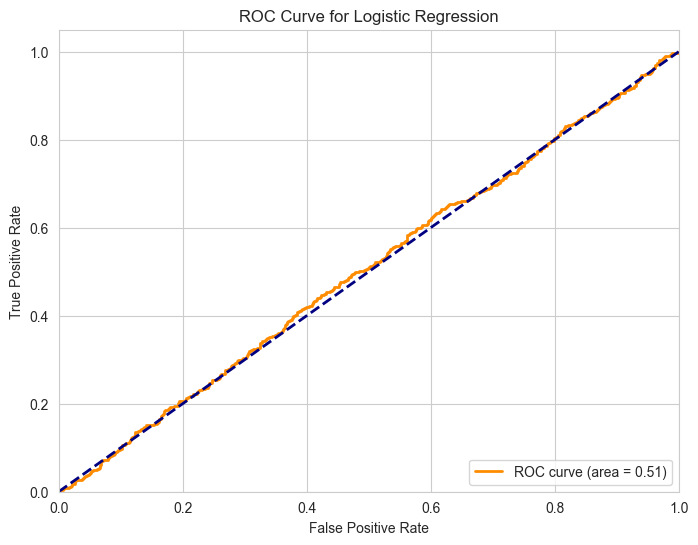


Top 10 Feature Coefficients (Logistic Regression):
                           Feature  Coefficient  Absolute_Coefficient
28       cat__Event_Type_Hackathon    -0.111827              0.111827
26      cat__Event_Type_Conference     0.080639              0.080639
34          cat__Event_Mode_Online    -0.075016              0.075016
18               cat__Region_South     0.072445              0.072445
22  cat__Platform_Source_Instagram    -0.071697              0.071697
19                cat__Region_West    -0.063892              0.063892
31        cat__Event_Type_Workshop    -0.063795              0.063795
35            cat__App_Installed_0    -0.056342              0.056342
10     cat__Department_Engineering    -0.056227              0.056227
36            cat__App_Installed_1     0.052537              0.052537
Positive coefficients increase likelihood of positive class (1).
Negative coefficients decrease likelihood of positive class (1).

--- Training and Evaluating Random Forest ---
A

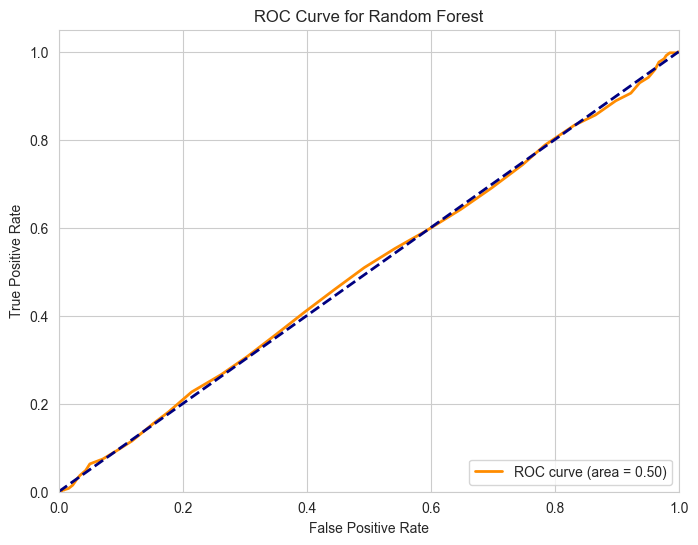


Top 10 Feature Importances (Random Forest):
                          Feature  Importance
3   num__Time_Spent_Total_Minutes    0.131403
0   num__Days_Since_Last_Activity    0.122506
1          num__Saved_Event_Count    0.081385
2            num__Feedback_Rating    0.059829
6     cat__User_Type_Professional    0.018181
5          cat__User_Type_Faculty    0.018141
4     cat__User_Type_Entrepreneur    0.017699
7          cat__User_Type_Student    0.017545
16               cat__Region_East    0.016561
33        cat__Event_Mode_Offline    0.016381


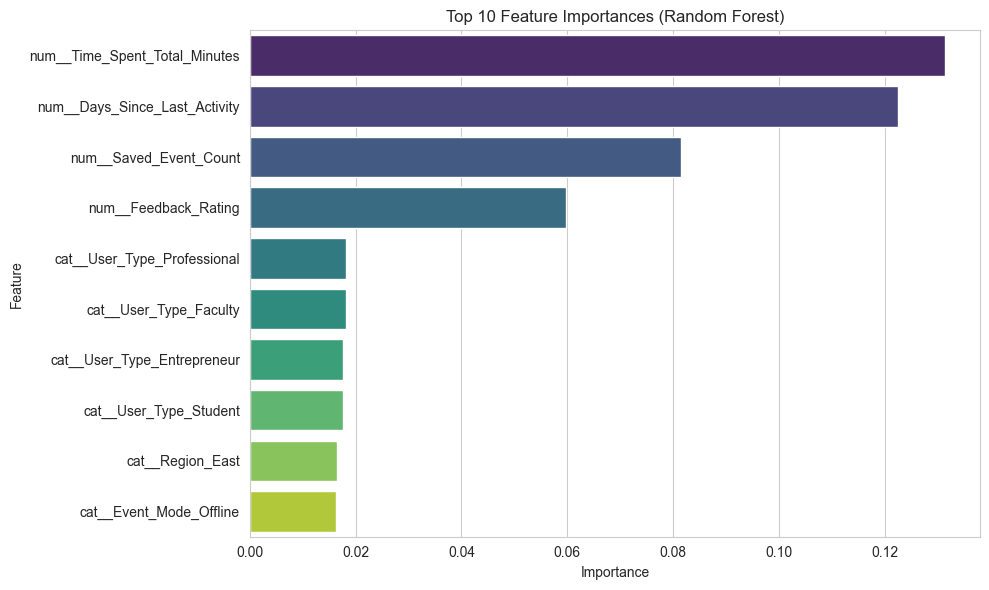


--- Training and Evaluating Support Vector Machine ---
Accuracy: 0.51
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.48      0.54      1193
           1       0.41      0.54      0.47       807

    accuracy                           0.51      2000
   macro avg       0.51      0.51      0.50      2000
weighted avg       0.53      0.51      0.51      2000

Confusion Matrix:
 [[572 621]
 [368 439]]
ROC AUC Score: 0.51


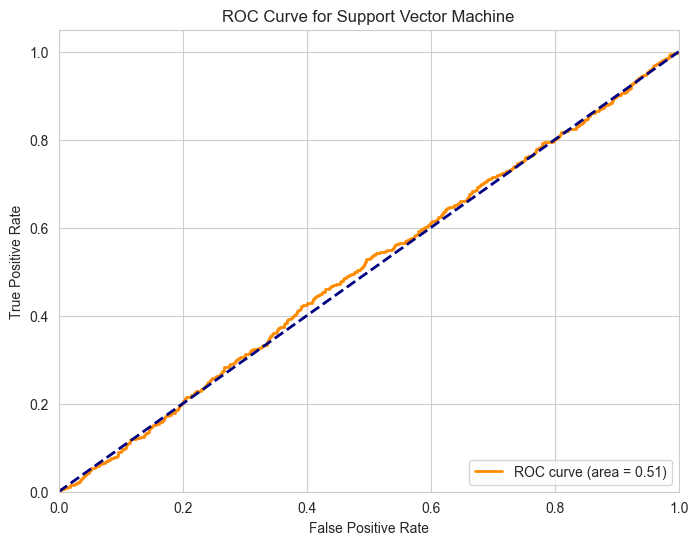


--- Training and Evaluating Gaussian Naive Bayes ---
Accuracy: 0.57
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.85      0.70      1193
           1       0.42      0.16      0.23       807

    accuracy                           0.57      2000
   macro avg       0.51      0.50      0.47      2000
weighted avg       0.53      0.57      0.51      2000

Confusion Matrix:
 [[1015  178]
 [ 680  127]]
ROC AUC Score: 0.50


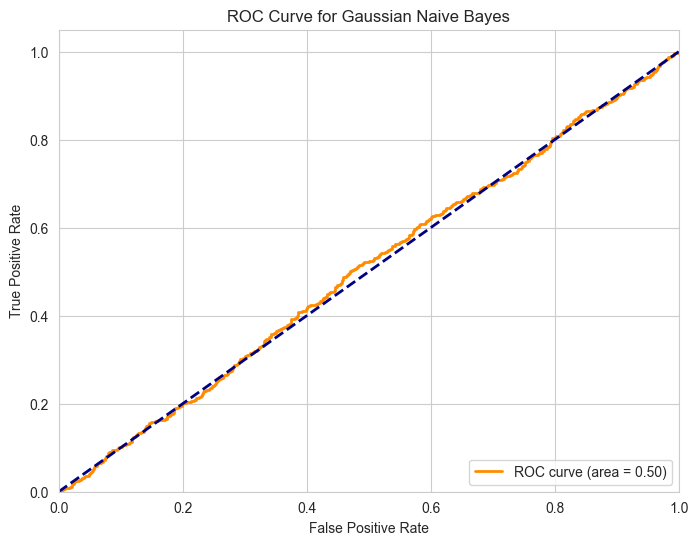


========== Course Completion Prediction Finished ==========

========== Predicting App Retention ==========

--- Training and Evaluating Logistic Regression ---
Accuracy: 0.50
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.49      0.57      1316
           1       0.35      0.53      0.42       684

    accuracy                           0.50      2000
   macro avg       0.51      0.51      0.49      2000
weighted avg       0.56      0.50      0.52      2000

Confusion Matrix:
 [[647 669]
 [324 360]]
ROC AUC Score: 0.50


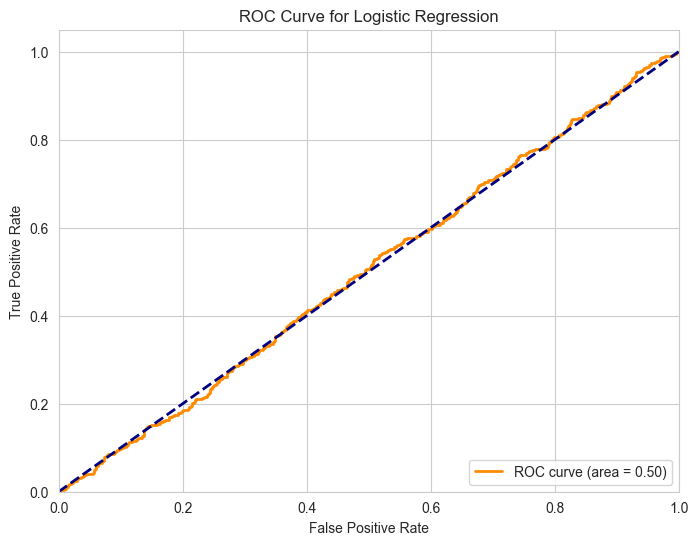


Top 10 Feature Coefficients (Logistic Regression):
                        Feature  Coefficient  Absolute_Coefficient
11      cat__Department_Medical    -0.114693              0.114693
9   cat__Department_Engineering     0.100523              0.100523
28         cat__Event_Type_STTP    -0.075422              0.075422
29      cat__Event_Type_Webinar    -0.064717              0.064717
27    cat__Event_Type_Hackathon     0.062937              0.062937
20   cat__Platform_Source_Email    -0.057409              0.057409
33       cat__Event_Mode_Online    -0.048787              0.048787
25   cat__Event_Type_Conference     0.045448              0.045448
31       cat__Event_Mode_Hybrid     0.040883              0.040883
13      cat__Department_Science    -0.037396              0.037396
Positive coefficients increase likelihood of positive class (1).
Negative coefficients decrease likelihood of positive class (1).

--- Training and Evaluating Random Forest ---
Accuracy: 0.65
Classification Repo

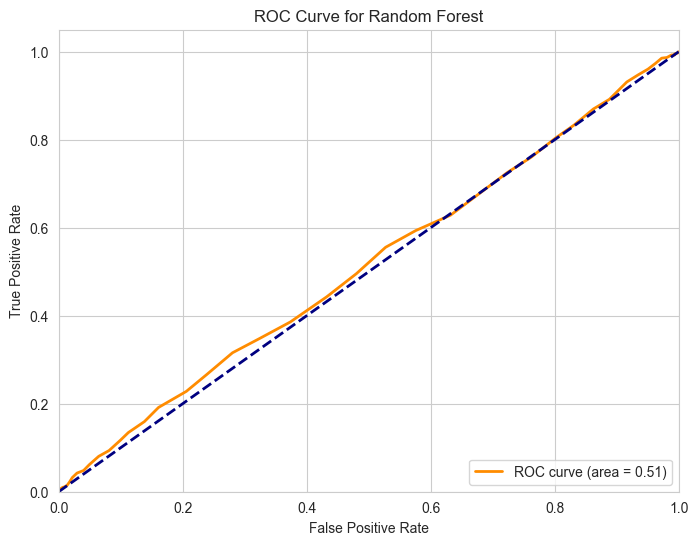


Top 10 Feature Importances (Random Forest):
                          Feature  Importance
2   num__Time_Spent_Total_Minutes    0.152674
0          num__Saved_Event_Count    0.093053
1            num__Feedback_Rating    0.067376
4          cat__User_Type_Faculty    0.019947
5     cat__User_Type_Professional    0.019927
6          cat__User_Type_Student    0.019856
31         cat__Event_Mode_Hybrid    0.019631
3     cat__User_Type_Entrepreneur    0.019509
32        cat__Event_Mode_Offline    0.019020
33         cat__Event_Mode_Online    0.018920


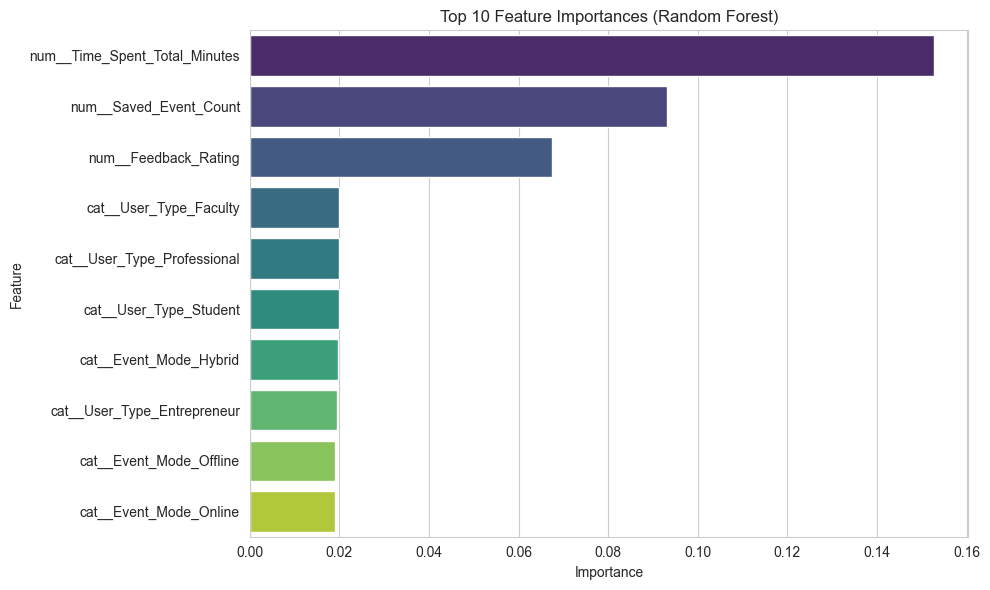


--- Training and Evaluating Support Vector Machine ---
Accuracy: 0.47
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.43      0.52      1316
           1       0.33      0.54      0.41       684

    accuracy                           0.47      2000
   macro avg       0.49      0.49      0.46      2000
weighted avg       0.54      0.47      0.48      2000

Confusion Matrix:
 [[572 744]
 [317 367]]
ROC AUC Score: 0.50


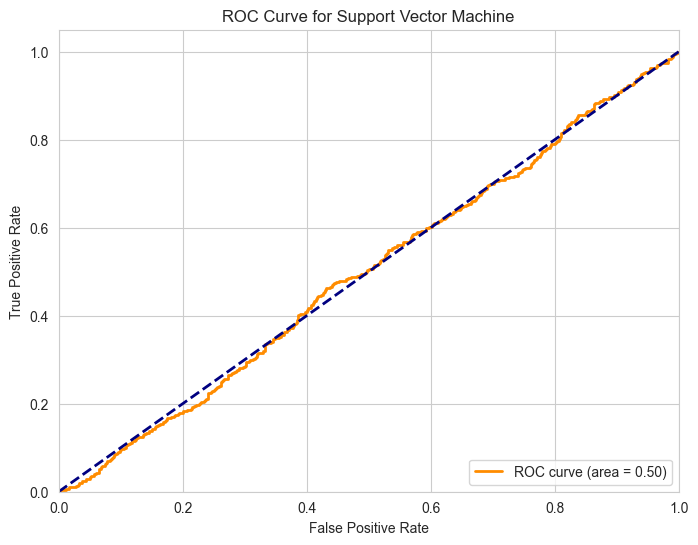


--- Training and Evaluating Gaussian Naive Bayes ---
Accuracy: 0.65
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.98      0.79      1316
           1       0.26      0.01      0.03       684

    accuracy                           0.65      2000
   macro avg       0.46      0.50      0.41      2000
weighted avg       0.52      0.65      0.53      2000

Confusion Matrix:
 [[1291   25]
 [ 675    9]]
ROC AUC Score: 0.51


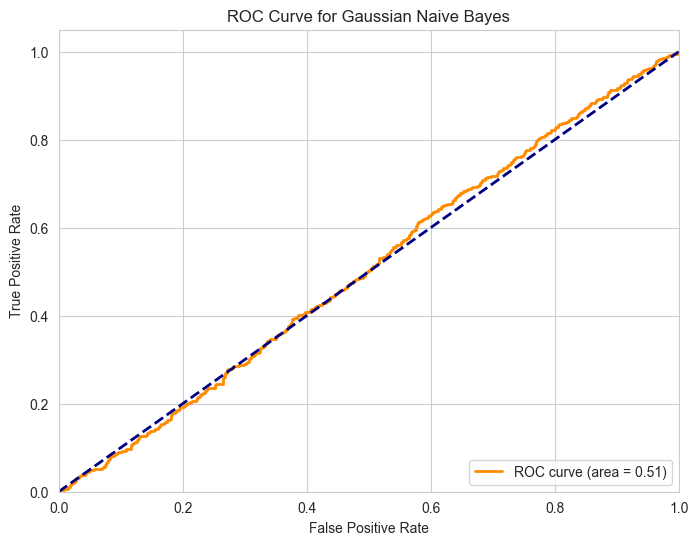


========== App Retention Prediction Finished ==========


In [6]:
# 6. Predictive Modeling: Multiple Approaches
# --------------------------------------------

# Define a function to train and evaluate models for cleaner code
# Note: numerical_features and categorical_features are now passed to the function
# to correctly map feature importances/coefficients after preprocessing.
def train_and_evaluate_model(X, y, preprocessor_pipeline, model_name, classifier_instance, numerical_features_for_model, categorical_features_for_model):
    print(f"\n--- Training and Evaluating {model_name} ---")

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size = 0.2, random_state = 42, stratify = y
    )

    # Build modeling pipeline
    model_pipeline = Pipeline([('preproc', preprocessor_pipeline), ('clf', classifier_instance)])

    # Train
    model_pipeline.fit(X_train, y_train)

    # Evaluate
    y_pred = model_pipeline.predict(X_test)
    y_pred_proba = model_pipeline.predict_proba(X_test)[:, 1] if hasattr(classifier_instance, 'predict_proba') else None

    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    if y_pred_proba is not None:
        roc_auc = roc_auc_score(y_test, y_pred_proba)
        print(f"ROC AUC Score: {roc_auc:.2f}")

        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        plt.figure(figsize = (8, 6))
        plt.plot(fpr, tpr, color = 'darkorange', lw = 2, label = f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve for {model_name}')
        plt.legend(loc = "lower right")
        plt.show()

    # Feature Importance/Coefficients (for interpretable models)
    try:
        # Get feature names after preprocessing from the fitted preprocessor
        feature_names_out = model_pipeline.named_steps['preproc'].get_feature_names_out()

        if model_name == "Logistic Regression":
            if hasattr(model_pipeline.named_steps['clf'], 'coef_'):
                coefficients = model_pipeline.named_steps['clf'].coef_[0]
                coef_df = pd.DataFrame({'Feature': feature_names_out, 'Coefficient': coefficients})
                coef_df['Absolute_Coefficient'] = np.abs(coef_df['Coefficient'])
                coef_df = coef_df.sort_values(by = 'Absolute_Coefficient', ascending = False)
                print("\nTop 10 Feature Coefficients (Logistic Regression):")
                print(coef_df.head(10))
                print("Positive coefficients increase likelihood of positive class (1).")
                print("Negative coefficients decrease likelihood of positive class (1).")
        elif model_name == "Random Forest":
            if hasattr(model_pipeline.named_steps['clf'], 'feature_importances_'):
                feature_importances = model_pipeline.named_steps['clf'].feature_importances_
                feature_importance_df = pd.DataFrame({'Feature': feature_names_out, 'Importance': feature_importances})
                feature_importance_df = feature_importance_df.sort_values(by = 'Importance', ascending = False)
                print("\nTop 10 Feature Importances (Random Forest):")
                print(feature_importance_df.head(10))
                plt.figure(figsize = (10, 6))
                sns.barplot(x = 'Importance', y = 'Feature', data = feature_importance_df.head(10), palette = 'viridis')
                plt.title('Top 10 Feature Importances (Random Forest)')
                plt.tight_layout()
                plt.show()
    except Exception as e:
        print(f"\nCould not display feature importances/coefficients for {model_name}: {e}")
        print("This might be due to issues with feature name extraction after complex preprocessing or model type.")


# --- 6.1 Objective 1: Predict Course Completion ---
print("\n========== Predicting Course Completion ==========")
# Target Variable (Y_completion)
y_completion = df['Course_Completed']
# Explanatory Variables (X) - exclude User_ID and the target itself
X_completion_cols = [col for col in df.columns if col not in ['User_ID', 'Course_Completed']]
X_completion = df[X_completion_cols]

# Create preprocessor specific to Course Completion task
preprocessor_completion, numerical_features_comp, categorical_features_comp = create_task_preprocessor(
    X_completion.columns,
    all_numerical_features_excluding_id,
    all_categorical_features
)

classifiers_completion = {
    "Logistic Regression": LogisticRegression(solver = 'liblinear', random_state = 42, max_iter = 1000, class_weight = 'balanced'),
    "Random Forest": RandomForestClassifier(n_estimators = 100, random_state = 42, class_weight = 'balanced'),
    "Support Vector Machine": SVC(kernel = 'linear', probability = True, random_state = 42, class_weight = 'balanced'),
    "Gaussian Naive Bayes": GaussianNB()
}

for name, classifier in classifiers_completion.items():
    train_and_evaluate_model(X_completion, y_completion, preprocessor_completion, name, classifier, numerical_features_comp, categorical_features_comp)
print("\n========== Course Completion Prediction Finished ==========")


# --- 6.2 Objective 2: Predict App Retention ---
print("\n========== Predicting App Retention ==========")

# Derive Target Variable (Y_retention)
retention_threshold = 30
df['App_Retained'] = (df['Days_Since_Last_Activity'] <= retention_threshold).astype(int)
y_retention = df['App_Retained']

# Explanatory Variables (X_retention) - Exclude direct leakage and identifiers
X_retention_cols = [col for col in df.columns if col not in ['User_ID', 'Days_Since_Last_Activity', 'Course_Completed', 'App_Retained']]
X_retention = df[X_retention_cols]

# Create preprocessor specific to App Retention task
preprocessor_retention, numerical_features_ret, categorical_features_ret = create_task_preprocessor(
    X_retention.columns,
    all_numerical_features_excluding_id,
    all_categorical_features
)

classifiers_retention = {
    "Logistic Regression": LogisticRegression(solver = 'liblinear', random_state = 42, max_iter = 1000, class_weight = 'balanced'),
    "Random Forest": RandomForestClassifier(n_estimators = 100, random_state = 42, class_weight = 'balanced'),
    "Support Vector Machine": SVC(kernel = 'linear', probability = True, random_state = 42, class_weight = 'balanced'),
    "Gaussian Naive Bayes": GaussianNB()
}

for name, classifier in classifiers_retention.items():
    train_and_evaluate_model(X_retention, y_retention, preprocessor_retention, name, classifier, numerical_features_ret, categorical_features_ret)
print("\n========== App Retention Prediction Finished ==========")


ROI by Platform_Source:
                  total_users  completions  completion_rate
Platform_Source                                           
YouTube                 1740          720         0.413793
LinkedIn                1673          691         0.413030
ACE Website             1631          659         0.404047
Email                   1665          672         0.403604
WhatsApp                1670          671         0.401796
Instagram               1621          624         0.384948

--- Marketing ROI: Conversion Funnel by Platform Source (Counts) ---
  Platform_Source  Total_Users  Installed  First_Login  Course_Completed  \
0     ACE Website         1631       1129          974               659   
1           Email         1665       1124         1023               672   
2       Instagram         1621       1141          955               624   
3        LinkedIn         1673       1166         1042               691   
4        WhatsApp         1670       1174         10

<Figure size 1500x800 with 0 Axes>

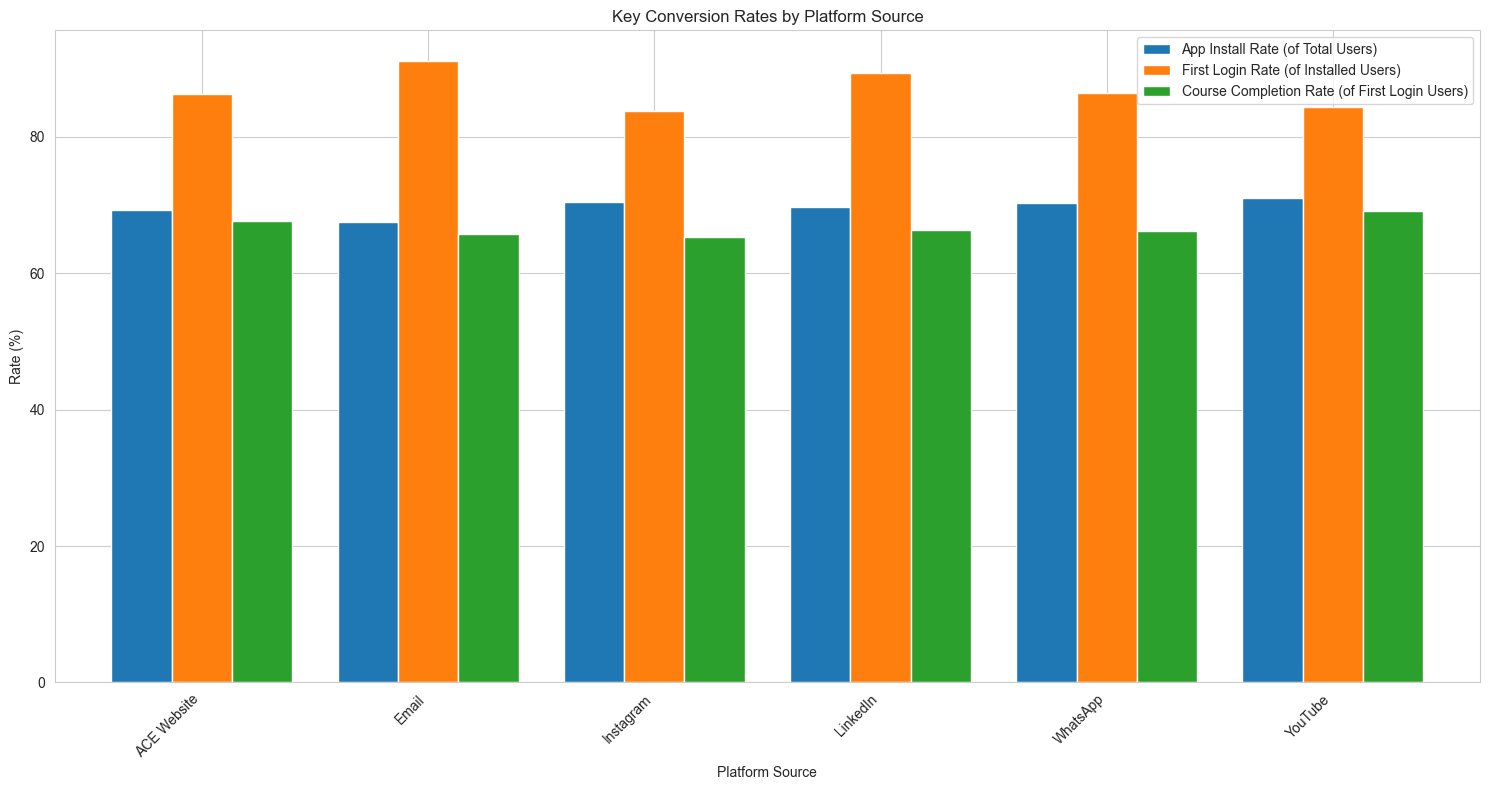

In [7]:
# Marketing ROI Analysis

# 7. Marketing ROI Analysis
# -------------------------
# Objective: Identify which Platform_Source yields highest course-completion rate.

roi = (
    df
    .groupby('Platform_Source')
    .agg(
        total_users=('User_ID', 'count'),
        completions=('Course_Completed', 'sum')
    )
    .assign(
        completion_rate=lambda x: x['completions'] / x['total_users']
    )
    .sort_values('completion_rate', ascending=False)
)
print("\nROI by Platform_Source:\n", roi)
# Why? Focus marketing spend on channels with the best outcomes.

# Assuming 'df' is your loaded DataFrame

# --- Implementation Steps ---

# 1. Group by Platform_Source and calculate counts for each key stage in the user journey:
# This helps us see the absolute numbers of users progressing through the funnel from each source.
funnel_data_counts = df.groupby('Platform_Source').agg(
    Total_Users=('User_ID', 'count'), # Total users acquired from this platform
    Installed=('App_Installed', lambda x: (x == 1).sum()), # Count of app installations
    First_Login=('First_Login_Completed', lambda x: (x == 1).sum()), # Count of first logins
    Course_Completed=('Course_Completed', lambda x: (x == 1).sum()), # Count of course completions
    Event_Registered=('Registered_for_Event', lambda x: (x == 1).sum()) # Count of event registrations
).reset_index()

print("\n--- Marketing ROI: Conversion Funnel by Platform Source (Counts) ---")
print(funnel_data_counts)

# 2. Calculate Conversion Rates between stages for each Platform:
# Why: Rates give a normalized view of performance, allowing comparison even if platforms have different total user counts.
# This quantifies the efficiency of each channel in converting users from one stage to the next.
funnel_data_rates = funnel_data_counts.copy() # Make a copy to calculate rates

funnel_data_rates['Install_Rate'] = (funnel_data_rates['Installed'] / funnel_data_rates['Total_Users']) * 100
funnel_data_rates['First_Login_Rate_of_Installs'] = (funnel_data_rates['First_Login'] / funnel_data_rates['Installed']) * 100
funnel_data_rates['Course_Completion_Rate_of_First_Login'] = (funnel_data_rates['Course_Completed'] / funnel_data_rates['First_Login']) * 100
funnel_data_rates['Event_Registration_Rate_of_First_Login'] = (funnel_data_rates['Event_Registered'] / funnel_data_rates['First_Login']) * 100

# Handle potential division by zero (e.g., if no installs, login rate of installs would be NaN)
funnel_data_rates = funnel_data_rates.fillna(0) # Replace NaN values with 0 for cleaner display

print("\n--- Marketing ROI: Conversion Funnel by Platform Source (Rates %) ---")
print(funnel_data_rates[['Platform_Source', 'Install_Rate', 'First_Login_Rate_of_Installs',
                   'Course_Completion_Rate_of_First_Login', 'Event_Registration_Rate_of_First_Login']].round(2))

# 3. Visualize Key Conversion Rates per Platform:
# Why: Visuals make it easier to compare platform performance at different stages.
plt.figure(figsize=(15, 8))
funnel_rates_plot_data = funnel_data_rates[['Platform_Source', 'Install_Rate', 'First_Login_Rate_of_Installs', 'Course_Completion_Rate_of_First_Login']].set_index('Platform_Source')
funnel_rates_plot_data.plot(kind='bar', figsize=(15, 8), width=0.8)
plt.title('Key Conversion Rates by Platform Source')
plt.ylabel('Rate (%)')
plt.xlabel('Platform Source')
plt.xticks(rotation=45, ha='right')
plt.legend(['App Install Rate (of Total Users)', 'First Login Rate (of Installed Users)', 'Course Completion Rate (of First Login Users)'])
plt.tight_layout()
plt.show()

# --- Behavioral Pattern Recognition from ROI analysis ---
# By examining the rates, you can identify patterns like:
# - "Platform X has a high App Install Rate but a very low Course Completion Rate, indicating an acquisition issue or a mismatch in user expectations."
# - "Platform Y has a lower App Install Rate but converts users to Course Completion very efficiently, suggesting high-quality leads."

In [8]:
# 8. Conversion Funnel Assessment (Detailed)
# ------------------------------------------
# Objective: Provide a comprehensive view of user progression through key stages,
# identifying drop-off points and associated user behavior metrics at each stage.

import pandas as pd
import numpy as np

# df = pd.read_excel('ECLEARNIX_Hackathon_10K_Dataset-1.xlsx')  # Load your data

funnel_stages = [
    ('App_Installed', 1),
    ('First_Login_Completed', 1),
    ('Registered_for_Event', 1),
    ('Course_Completed', 1)
]
stage_names = ['App Installed', 'First Login', 'Event Registered', 'Course Completed']

def safe_mean(series, default=0.0):
    m = series.mean()
    return default if np.isnan(m) else m

def safe_pct(num, denom, default=0.0):
    return (num / denom * 100) if denom else default

def safe_div(num, denom, default=0.0):
    return (num / denom) if denom else default

results = []
df_stage = df.copy()
total_users = len(df)

for i, (col, flag) in enumerate(funnel_stages):
    df_stage = df_stage[df_stage[col] == flag]
    n = len(df_stage)

    avg_feedback = safe_mean(df_stage['Feedback_Rating'])
    avg_time = safe_mean(df_stage['Time_Spent_Total_Minutes'])
    avg_saved_events = safe_mean(df_stage['Saved_Event_Count'])
    newsletter_pct = safe_pct((df_stage['Newsletter_Subscribed'] == 1).sum(), n)
    dau = int((df_stage['Days_Since_Last_Activity'] == 0).sum())
    retention_7d = safe_pct((df_stage['Days_Since_Last_Activity'] <= 7).sum(), n)
    retention_30d = safe_pct((df_stage['Days_Since_Last_Activity'] <= 30).sum(), n)

    # Hidden: Onboarding friction % (installed but never logged in)
    onboarding_friction = 0
    if i == 1 and results:
        prev_users = results[0]['Users']
        onboarding_friction = safe_pct(prev_users - n, prev_users)

    # Hidden: Learning velocity (mean time to completion at this/previous stage)
    learning_velocity = None
    if i > 0:
        prev_stage = funnel_stages[i-1][0]
        stage_users = df[(df[prev_stage] == funnel_stages[i-1][1]) & (df[col] == flag)]
        if i == 3:  # Only compute for course completion stage
            learning_velocity = safe_mean(stage_users['Time_Spent_Total_Minutes'])
    else:
        learning_velocity = None

    results.append({
        'Stage': stage_names[i],
        'Users': n,
        'Avg Feedback': round(avg_feedback, 2),
        'Avg Time (min)': round(avg_time, 2),
        'Avg Saved Events': round(avg_saved_events, 2),
        'Newsletter Opt-in %': round(newsletter_pct, 1),
        'DAU (last day)': dau,
        'Retention ≤7d %': round(retention_7d, 1),
        'Retention ≤30d %': round(retention_30d, 1),
        'Onboarding Friction %': round(onboarding_friction, 2) if i == 1 else '',
        'Learning Velocity (min)': round(learning_velocity, 2) if (learning_velocity is not None and not np.isnan(learning_velocity)) else '',
    })

# Conversion rates (safe against div by 0)
for i in range(len(results)-1, 0, -1):
    prev = results[i-1]['Users']
    curr = results[i]['Users']
    results[i]['Conversion from prev %'] = round(safe_pct(curr, prev), 2)
results[0]['Conversion from prev %'] = round(safe_pct(results[0]['Users'], total_users), 2)

# If you want no NaN at all, fill default on every .get and force 0 with .fillna:
results_df = pd.DataFrame(results).fillna(0)
print(results_df)

              Stage  Users  Avg Feedback  Avg Time (min)  Avg Saved Events  \
0     App Installed   6969          3.02          255.02              4.56   
1       First Login   4171          3.02          253.46              4.58   
2  Event Registered   2074          3.00          254.34              4.55   
3  Course Completed    866          2.96          251.18              4.50   

   Newsletter Opt-in %  DAU (last day)  Retention ≤7d %  Retention ≤30d %  \
0                 25.9              76              8.9              33.8   
1                 25.9              53              9.4              33.9   
2                 26.5              31              9.5              33.7   
3                 26.9               9              9.2              36.0   

  Onboarding Friction % Learning Velocity (min)  Conversion from prev %  
0                                                                 69.69  
1                 40.15                                           59.85  
2

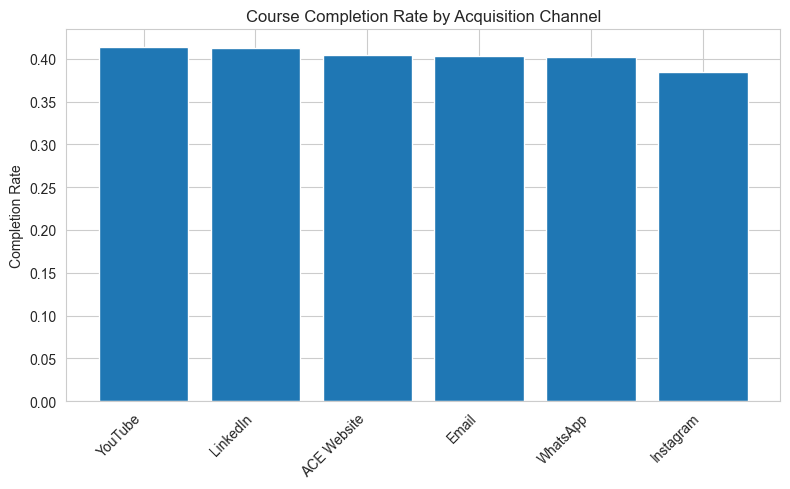

In [9]:
# 9. Dashboard Implementation Prep (example with matplotlib)
# -------------------------------------------------
# Objective: Prepare data and provide illustrative visualizations for dashboard tools like Power BI.

# Example: Bar chart of completion_rate by Platform_Source (uses 'roi' from Marketing ROI Analysis)
plt.figure(figsize=(8,5))
plt.bar(roi.index, roi['completion_rate'])
plt.title("Course Completion Rate by Acquisition Channel")
plt.ylabel("Completion Rate")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
# Why? Visual dashboards help stakeholders quickly grasp which channels to invest in.

# For Power BI/Tableau: The 'df' DataFrame (potentially with the 'Cluster' and 'App_Retained' columns)
# after all processing can be exported as an Excel or CSV for direct import into these tools.
# The 'roi' and 'results_df' from the funnel analysis are also excellent candidates for dashboard tables.

In [10]:
# Next Steps and Strategy Recommendation

# 10. Next Steps & Strategy Recommendations
# ----------------------------------------
# - Dive deeper on churn: model Days_Since_Last_Activity to predict drop-offs.
# - Profile clusters: examine mean stats per cluster to name segments (e.g., “High-Engagers”).
# - Build interactive dashboards (e.g., Power BI, Tableau) using these metrics.
# - A/B test targeted email or push notifications per segment to boost re-engagement.

import openpyxl

# Save processed data for dashboard tools
df.to_excel('processed_elearnix_users.xlsx', index=False)
print("\nSaved processed data to 'processed_elearnix_users.xlsx'")


Saved processed data to 'processed_elearnix_users.xlsx'
